In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [39]:
# load and read data
reviews=pd.read_csv('/content/IMDB Data.csv')
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [40]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     9999 non-null   object
 1   sentiment  9999 non-null   object
dtypes: object(2)
memory usage: 156.4+ KB


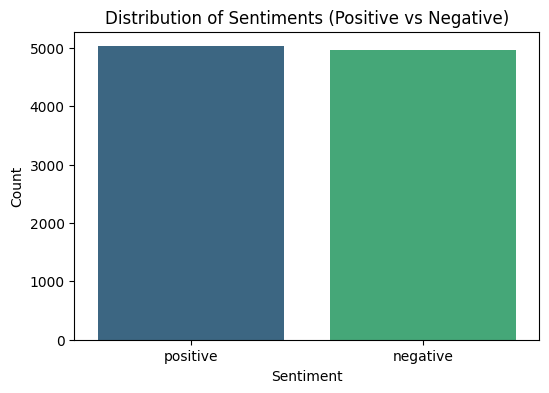

In [41]:
# distribution of sentiment
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=reviews, palette="viridis",hue='sentiment', legend=False)
plt.title("Distribution of Sentiments (Positive vs Negative)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [42]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already done
nltk.download('stopwords')

# Define stopwords
stop_pwords = stopwords.words('english')

# Preprocessing function
def preprocess_text(text):
    # Remove HTML tags
    text_no_html = re.sub(r'<.*?>', '', text)
    # Tokenize text using a regex tokenizer
    tokenizer_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text_no_html)
    # Remove stopwords and convert to lowercase
    cleaned_tokens = [word.lower() for word in tokenizer_document if word.lower() not in stop_pwords]
    # Apply stemming
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    # Return processed tokens
    return stemmed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# Apply the function to all reviews
reviews['clean_review'] = reviews['review'].apply(preprocess_text)
reviews.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,"[one, review, mention, watch, 1, oz, episod, h..."
1,A wonderful little production. <br /><br />The...,positive,"[wonder, littl, product, film, techniqu, unass..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,negative,"[basic, there', famili, littl, boy, jake, thin..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei', love, time, money, visual, s..."


In [44]:
# reviews["clean_review"] = reviews["clean_review"].apply(lambda x: ' '.join(x))
# reviews.head()

In [45]:
print(reviews.clean_review[0])

['one', 'review', 'mention', 'watch', '1', 'oz', 'episod', 'hook', 'right', 'exactli', 'happen', 'first', 'thing', 'struck', 'oz', 'brutal', 'unflinch', 'scene', 'violenc', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'heart', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violenc', 'hardcor', 'classic', 'use', 'word', 'call', 'oz', 'nicknam', 'given', 'oswald', 'maximum', 'secur', 'state', 'penitentari', 'focus', 'mainli', 'emerald', 'citi', 'experiment', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privaci', 'high', 'agenda', 'em', 'citi', 'home', 'mani', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'scuffl', 'death', 'stare', 'dodgi', 'deal', 'shadi', 'agreement', 'never', 'far', 'away', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goe', 'show', 'dare', 'forget', 'pretti', 'pictur', 'paint', 'mainstream', 'audienc', 'forget', 'charm', 'forget', 'romanc', 'oz', 'mess', 'around', 'first', 'episod', '

In [46]:
# Top 10 most common words in a sample of reviews
from collections import Counter

# Access the 'clean_review' column of the DataFrame
all_words = [word for review in reviews['clean_review'] for word in review] # using reviews['clean_review'] instead of clean_review
word_freq = Counter(all_words)
top_10_words = word_freq.most_common(10)

for word, count in top_10_words:
    print(f'{word}: {count}')

movi: 20635
film: 18467
one: 10868
like: 9036
time: 6277
good: 6052
make: 5992
get: 5659
watch: 5582
see: 5557


In [47]:
from sklearn.feature_extraction.text import CountVectorizer

# TF-IDF Vectorization
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(reviews["clean_review"].map(' '.join))
X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,37856,37857,37858,37859,37860,37861,37862,37863,37864,37865
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# from sklearn.feature_extraction.text import CountVectorizer

# # TF-IDF Vectorization
# vectorizer=CountVectorizer()

# # Ensure 'clean_review' column contains strings and join list of words into strings
# reviews["clean_review"] = reviews["clean_review"].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# X=vectorizer.fit_transform(reviews["clean_review"]) # removed .map(' '.join)
# X=pd.DataFrame(X.toarray())
# X.head()

In [49]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
y= reviews["sentiment"]
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=99)

In [50]:
from sklearn.naive_bayes import MultinomialNB

# Train the Multinomial Naive Bayes model
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [51]:
from sklearn import metrics

# Make predictions
y_pred= model.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{confusion_matrix}")

# Generate classification report
classification_report = metrics.classification_report(y_test, y_pred)
print(f"Classification Report:\n{classification_report}")

Accuracy: 0.8295
Confusion Matrix:
[[804 145]
 [196 855]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.85      0.83       949
    positive       0.85      0.81      0.83      1051

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



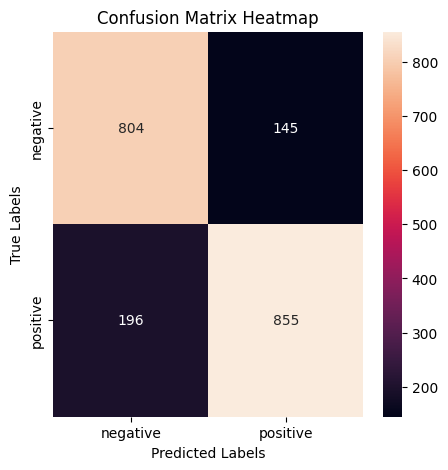

In [52]:
# Visualizing confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])

# Add labels, title, and adjust layout
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

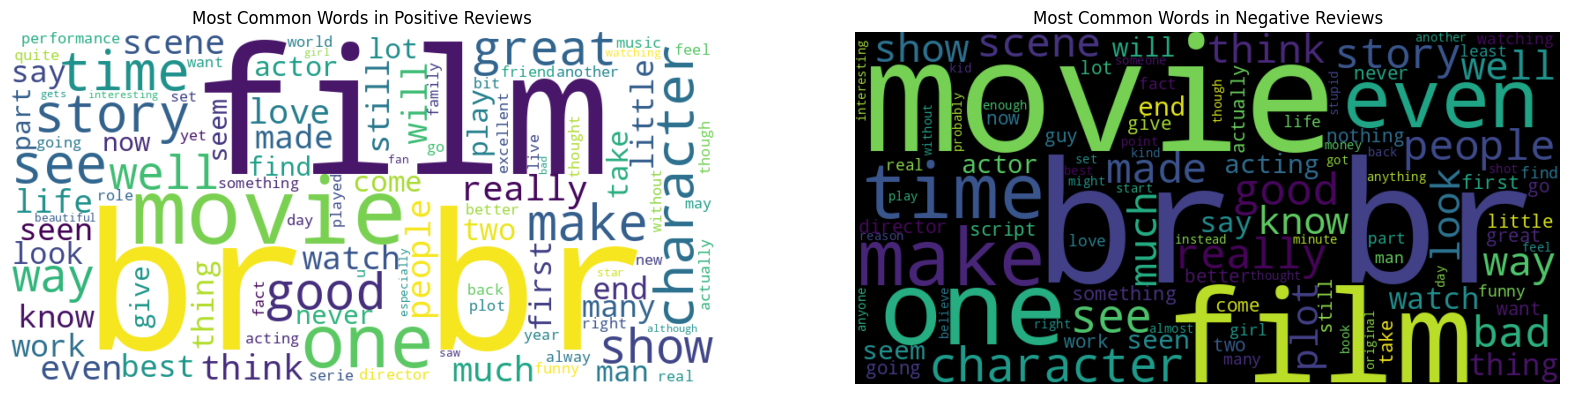

In [53]:
# Separate positive and negative reviews
positive_reviews = reviews[reviews['sentiment'] == 'positive']['review']
negative_reviews = reviews[reviews['sentiment'] == 'negative']['review']

# Function to get most common words
def get_common_words(text, num_words=50):
    words = ' '.join(text).lower().split()
    return Counter(words).most_common(num_words)

# Plot word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black').generate(' '.join(negative_reviews))

# Show word clouds
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.title("Most Common Words in Positive Reviews")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.title("Most Common Words in Negative Reviews")
plt.axis("off")
plt.show()

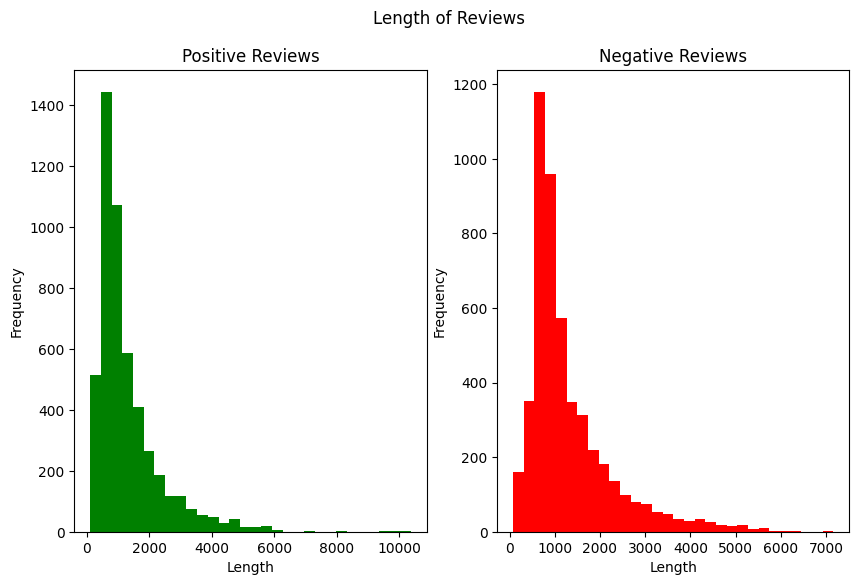

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter review lengths by sentiment
text_len_positive = reviews[reviews['sentiment'] == "positive"]['review'].str.len()  # Lengths of positive reviews
text_len_negative = reviews[reviews['sentiment'] == "negative"]['review'].str.len()  # Lengths of negative reviews

# Create subplots for side-by-side histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Positive reviews histogram
ax1.hist(text_len_positive, bins=30, color='green')  # Green histogram for positive reviews
ax1.set_title('Positive Reviews')                   # Title for the positive reviews subplot
ax1.set_xlabel('Length')                            # X-axis label
ax1.set_ylabel('Frequency')                         # Y-axis label

# Negative reviews histogram
ax2.hist(text_len_negative, bins=30, color='red')   # Red histogram for negative reviews
ax2.set_title('Negative Reviews')                   # Title for the negative reviews subplot
ax2.set_xlabel('Length')                            # X-axis label
ax2.set_ylabel('Frequency')                         # Y-axis label

# Add a shared title for the figure
fig.suptitle('Length of Reviews')                   # Shared title

# Display the plot
plt.show()


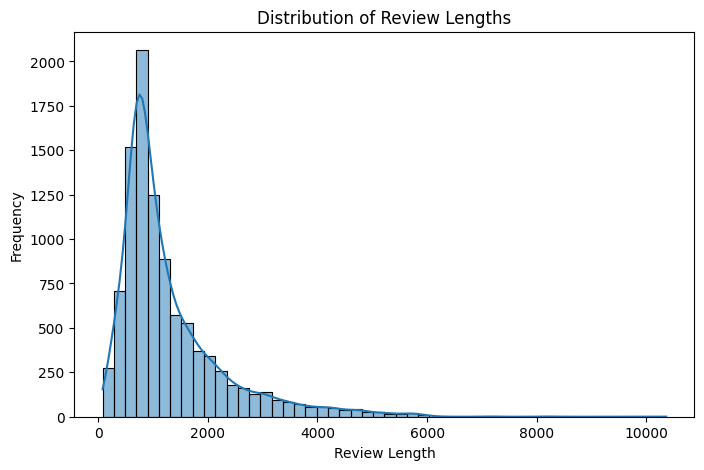

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a column for review length
reviews['review_length'] = reviews['review'].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(8, 5))
sns.histplot(reviews['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

## Sentiment Analysis

In [56]:
# create s function to check the new input for sentiment analysis
def expression_check(prediction_input):
  if prediction_input[0] == "negative": # Access the first element (prediction)
    print("Input statement has Negative Sentiment.")
  elif prediction_input[0] == "positive": # Access the first element (prediction)
    print("Input statement has Positive Sentiment.")
  else:
    print("Invalid Statement.") # This should ideally not happen now

In [57]:
def sentiment_predictor(input):
  transformed_input = vectorizer.transform(input)
  prediction = model.predict(transformed_input)
  expression_check(prediction)

input1 = ["I don't think i can tolerate this movie any more" ]
input2 = ["Love this app! Simply awesome."]
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has Negative Sentiment.
Input statement has Positive Sentiment.


In [58]:
## Simple version without function
input1 = ["Love this app! Simply awesome."]
input2= ["I don't think i can tolerate this movie any more" ]

#new_review_cleaned = [' '.join(new_review)]  # Preprocess to match training
new_review_transformed = vectorizer.transform(input2)

# Assuming you have a trained model named 'model' (e.g., from previous cells)
# Replace 'model' with the actual name of your trained model if different
new_prediction = model.predict(new_review_transformed)
new_prediction

array(['negative'], dtype='<U8')

In [59]:
model.predict(vectorizer.transform(['This movie is sick']))

array(['negative'], dtype='<U8')